<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
from __future__ import print_function

%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Interação Numérica

**Objectivo:** Avaliar o integral

$$ \int^b_a f(x) dx$$

O valor de muitos integráreis pode ser descrita analiticamente (não tem forma fechada):
$$ 
   \int^b_a \sqrt{1 + \cos^2 x} dx
$$

Solução de equações diferencias ordinárias:
   
   $$\frac{\text{d}^2 u}{\text{d}t^2} = f\left(u, \frac{\text{d} u}{\text{d}t}, t \right)$$
   
   Seja $v = \frac{\text{d} u}{\text{d}t}$ vem

   $$\begin{bmatrix}
   \frac{\text{d} v}{\text{d}t} \\ \frac{\text{d} u}{\text{d}t} \end{bmatrix} = \begin{bmatrix} f(u, v, t) \\ v \end{bmatrix}$$
   
   Que se pode resolver por integração
   
   $$\begin{bmatrix}
   v \\ u \end{bmatrix} = \begin{bmatrix} v(t_0) + \int^t_{t_0} f(u, v, \hat{t}) d\hat{t} \\ u(t_0) + \int^t_{t_0} v d\hat{t} \end{bmatrix}$$  

### Base da Quadratura

O objetivo é calcular o integral definido $I$ recorrendo a uma aproximação $I_N$ tal que
$$
    I = \int^b_a f(x) dx \approx I_N = \sum^{N}_{i=1} w_i f(x_i)
$$
onde os $x_i$ são os  *pontos de quadratura* ou *nós* e o $w_i$ são os *pesos*.  A  regra de quadratura escolhida, para resolver um problema, determina os nós $x_i$ para os quais são calculados pesos $w_i$.

A convergência duma regra de quadratura escolhida implica que
$$
    \lim_{N \rightarrow \infty} I_N = I.
$$


## Somas de Riemann

Dado $f(x)$ e uma partição do intervalo $[a,b]$ definida por pontos $\{x_i\}^N_{i=0}$ e $a = x_0 < x_1 < \ldots < x_N = b$, com os $x^*_i \in [x_i, x_{i+1}]$ definimos integral a Riemann como

$$\int^b_a f(x) dx = \lim_{N\rightarrow \infty} \sum^{N-1}_{i=0} f(x_i^*) (x_{i+1} - x_i)$$

Como recorda esta é a definição de integral definido e pode ser usada para gerar regras de quadratura em função da forma como se escolhe  $x_i^* \in [x_i, x_{i+1}]$.

### Regra de quadratura do ponto médio

Escolhendo $x_i^*$ tal que

$$x_i^* = \frac{x_{i+1} + x_i}{2}$$

temos a regra

$$I[f] = \int^b_a f(x) dx \approx \sum^{N-1}_{i=0} f\left(\frac{x_{i+1} + x_i}{2} \right ) (x_{i+1} - x_i) = I_N[f]$$

em $\Delta x_i = x_{i+1} - x_i$ 

#### Exemplo:  Integrando usando o método do ponto médio

Cálculo e ilustração do método do ponto médio.  Aqui estamos a calcular o valor duma função integral:

$$
    \int^x_0 sin(w) dw = \left . -\cos w \right|^x_0 = 1 - \cos x
$$

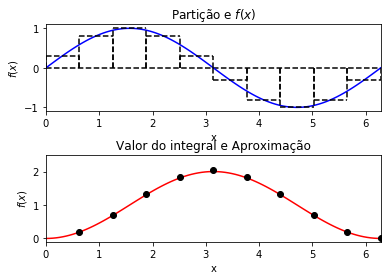

In [2]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_star[i]), f(x_star[i])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partição e $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(x_star.shape)
I_hat[0] = f(x_star[0]) * delta_x
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + f(x_star[i]) * delta_x
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_star + delta_x / 2.0, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Valor do integral e Aproximação")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

### Fórmulas de Newton-Cotes

Nas fórmulas são usados $N+1$ pontos igualmente espaçados, avaliados em $f(x)$ 

e permitem determinar o valor exato do integral de polinómios de grau $N$:

$$I_N[f] = \int^b_a P_N(x) dx$$

#### Regra dos Trapézios



Regra do trapézio usamos polinómios de ordem $N = 1$ entre pares de pontos.  O coeficiente do polinómio em cada secção é dada por

$$p_0 = f(x_i) \quad \quad p_1 = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}$$

donde resulta o polinómio interpolador

$$p_1(x) = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} ( x- x_i) + f(x_i)$$

Integrando o polinómio obtemos

$$\begin{aligned}
    I_N[f] &= \int^{x_{i+1}}_{x_i} (p_0 + p_1 (x - x_i)) dx = \left . p_0 x + p_1 \left (\frac{x^2}{2} - x_i x\right) \right |^{x_{i+1}}_{x_i} \\
    &= p_0 \Delta x + p_1 \left (\frac{1}{2} (x_{i+1} + x_i) \Delta x - x_i \Delta x\right) \\
    &= f(x_i) \Delta x + (f(x_{i+1}) - f(x_i))\left (\frac{1}{2} (x_{i+1} + x_i) - x_i\right) \\
    &= f(x_i) \Delta x + (f(x_{i+1}) - f(x_i)) \frac{\Delta x}{2} \\
    & = \frac{\Delta x}{2} (f(x_{i+1}) + f(x_i))
\end{aligned}$$

Podemos simplificar a soma estendida a todo o domínio notando que o peso nós extremos é metade dos restantes que têm peso $\Delta x$

$$
    I_N[f] = \frac{\Delta x}{2}f(x_0) + \sum^{N-1}_{j=1} \Delta x f(x_j)+\frac{\Delta x}{2}  f(x_N) 
$$

Esta é conhecida por regra dos trapézios composta.

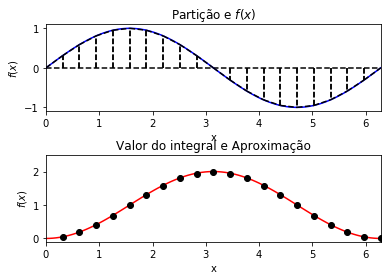

In [3]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 20
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i+1])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_hat[i]), f(x_hat[i+1])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partição e $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(x_hat.shape)
I_hat[0] = (f(x_hat[1]) + f(x_hat[0])) * delta_x / 2.0
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x / 2.0
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Valor do integral e Aproximação")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

#### Regra de Simpson

Para a regra de Simpson é usado um polinómio de grau $N = 2$  entre pontos.

Estes polinómios têm a forma:

$$P_2(x) = \frac{2 f(x_i)}{\Delta x^2} \left (x - \frac{\Delta x}{2} \right ) (x - \Delta x) - \frac{4 f\left(x_i + \frac{\Delta x}{2}\right)}{\Delta x^2}  x (x - \Delta x) + \frac{2 f(x_{i+1})}{\Delta x^2} x \left (x - \frac{\Delta x}{2} \right )$$

Integrando este polinómio obtemos

$$
    I_N[f] = \int^{x_{i+1}}_{x_i} P_2(x) dx = \frac{\Delta x}{6} f(x_i) + \frac{2 \Delta x}{3} f\left(x_i + \frac{\Delta x}{2} \right ) + \frac{\Delta x}{6} f(x_{i+1})
$$

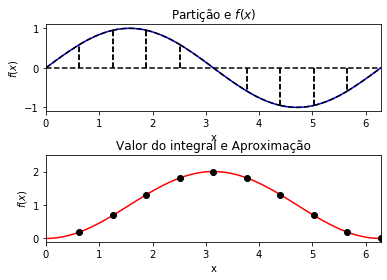

In [4]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i + 1])], 'k--')
    coeff = numpy.polyfit((x_hat[i], x_hat[i] + delta_x / 2.0, x_hat[i + 1]), 
                          (f(x_hat[i]), f(x_hat[i] + delta_x / 2.0), f(x_hat[i+1])), 2)
    x_star = numpy.linspace(x_hat[i], x_hat[i+1], 10)
    axes.plot(x_star, numpy.polyval(coeff, x_star), 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partição e $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(x_hat.shape)
I_hat[0] = delta_x * (1.0 / 6.0 * (f(x_hat[0]) + f(x_hat[1])) + 2.0 / 3.0 * f(x_hat[0] + delta_x / 2.0))
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + delta_x * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x / 2.0))
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Valor do integral e Aproximação")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

## Análise do Erro

Do que derivamos anteriormente podemos obter esquemas de quadratura $I_N$ que podem ser escritos na forma
$$
    I_N[f] = \sum^{N-1}_{i=0} w_i f(x_i).
$$

Definindo erro $E[f]$ tal que

$$I[f] = I_N[f] + E_N[f]$$

O grau de $I_N[f]$ é um natural $N$ tal que $E_N[p_i] = 0 \quad \forall i \leq n$ e $\exists p_{n+1}$ tal que $E[p_{n+1}] \neq 0$, onde por $p_i$ denotamos um polinómio de grau $i$.

### Precisão na quadratura

Do Teorema de Lagrange temos que o resto da interpolação é

$$R_N(x) = (x - x_0)(x - x_1) \cdots (x- x_N) \frac{f^{(N+1)}(c)}{(N+1)!}$$

Se integrarmos este resto obtemos o erro num intervalo simples.

Para determinar o erro total basta somar o erro de cada intervalo, donde 

$$I[f] = \sum_{i=0}^N \int^{x_{i+1}}_{x_i} P_N(x) dx + \sum_{i=0}^N \int^{x_{i+1}}_{x_i} R_N(x) dx = I_N[f] + E_N[f]$$



#### Erro no método do trapézio

Para $N=1$ temos

$$R_1(x) = (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2}$$

Integrado obtemos

$$\int^{x_{i+1}}_{x_i} (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2} dx = \frac{\Delta x^3}{12} f''(c)$$

que define a fórmula do erro.

Somando o erro em cada intervalo obtemos o erro total

$$E_N[f] = -\frac{\Delta x^3}{12} \sum_{i=0}^{N} f''(c_i)$$

ou seja

$$E_N[f] = -\frac{1}{2} \Delta x^2 (b - a) \left [ \frac{1}{N} \sum^{N-1}_{i=0} f''(c_i) \right ]$$

aqui a expressão entre parêntese retos é o valor médio da segunda derivada no intervalo $[a,b]$. Esta formula também destaca que a regra do trapézio tem uma convergência quadrática quando  $\Delta x \rightarrow 0$.

#### Erro na regra de Simpson

Aqui $N = 2$ e 

$$R_2(x) = (x - x_i) \left(x - x_i - \frac{\Delta x}{2} \right) (x - x_{i+1}) \frac{f'''(c)}{3!}$$

Integrando e somando as várias contribuições do erro temos


$$E_N[f] = -\frac{1}{180} (b - a) \Delta x^4 f^{(4)}(c)$$

Note que acabamos de ganhar duas ordens na precisão por incrementar um  grau no polinómio interpolador!

##### Exemplo 1:

Para $f(x) = \sin \pi x$ comparemos a precisão das regras do ponto médio, trapézio e Simpson no intervalo $x\in[0,1]$.

$$\begin{aligned}
    \text{Exato:}  &I[f] = \int^1_0 \sin \pi x = \left . \frac{-\cos \pi x}{\pi} \right |^1_0 = \frac{2}{\pi} \approx 0.636619772 \\
    \text{Ponto médio:}  &I_1[f] = \Delta x f(1/2) = \sin (\pi / 2) = 1 \\
    \text{Trapézio:}  &I_1[f] = \frac{\Delta x}{2} (\sin(0) + \sin(\pi)) = 0 \\
    \text{Simpson:}  &I_1[f] = \frac{\Delta x}{6} \sin(0) + \frac{2 \Delta x}{3} \sin(\pi / 2) + \frac{\Delta x}{6} \sin(\pi) = \frac{2 \Delta x}{3} = \frac{2}{3}
\end{aligned}$$

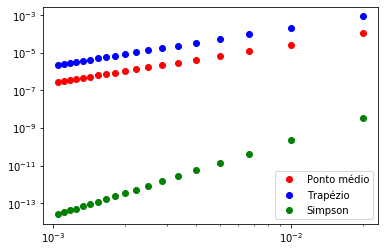

In [5]:
# Cálculo do erro em função de delta_x para cada método
f = lambda x: numpy.sin(numpy.pi * x)

num_partitions = range(50, 1000, 50)
delta_x = numpy.empty(len(num_partitions))
error_mid = numpy.empty(len(num_partitions))
error_trap = numpy.empty(len(num_partitions))
error_simpson = numpy.empty(len(num_partitions))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N + 1)
    delta_x[j] = x_hat[1] - x_hat[0]

    # Compute Midpoint
    x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
    I_hat = 0.0
    for i in range(0, N):
        I_hat += f(x_star[i]) * delta_x[j]
    error_mid[j] = numpy.abs(I_hat - 2.0 / numpy.pi)
    
    # Compute trapezoid
    I_hat = 0.0
    for i in range(1, N):
        I_hat += (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x[j] / 2.0
    error_trap[j] = numpy.abs(I_hat - 2.0 / numpy.pi)
    
    # Compute simpson's    
    I_hat = 0.0
    for i in range(0, N):
        I_hat += delta_x[j] * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x[j] / 2.0))
    error_simpson[j] = numpy.abs(I_hat - 2.0 / numpy.pi)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error_mid, 'ro', label="Ponto médio")
axes.loglog(delta_x, error_trap, 'bo', label="Trapézio")
axes.loglog(delta_x, error_simpson, 'go', label="Simpson")

axes.legend(loc=4)

plt.show()

## Função de integração do SciPy 

O SciPy tem várias funções de integração:


    :toctree: generated/

    integrate.trapz         -- Use trapezoidal rule to compute integral.
    integrate.cumtrapz      -- Use trapezoidal rule to cumulatively compute integral.
    integrate.simps         -- Use Simpson's rule to compute integral from samples.
    integrate.romb          -- Use Romberg Integration to compute integral from


In [6]:
import scipy.integrate as integrate
#integrate?

### Regras completas (ver notas das aulas)

#### regra de trapézios composta 
$$ I = \frac{h}{2}(f_0+2f_1+\dots+2f_{n-1}+f_n) - \frac{(x_n-x_0)h^2}{12}f''(c)$$
com $c \in [x_0,x_n]$.

#### regra de Simpson composta 
$$ I = \frac{h}{3}(f_0+4f_1+2f_2+4f_3+\dots+2f_{n-2}+4f_{n-1}+f_n) - \frac{(x_n-x_0)h^4}{180}f^{(IV)}(c)$$
com $c \in [x_0,x_n]$.

Ex 6.1 Seja $$ I=\int^{1.2}_{1.0} \frac{\sin(x)}{x} dx$$
1. Utilize a regra dos trapézios simples para aproximar o valor de $I$ e apresente um majorantedo erro de truncatura.
2. Utilize a regra de Simpson simples para aproximar o valor de $I$ e apresente um majorantedo erro de truncatura.

Ex 6.2 Seja $$ I=\int^{6}_{0} \frac{1}{1+x^2} dx$$
1. Calcule o valor exacto de $I$.
2. Utilize uma regra de Newton-Cotes simples para aproximar o valor de $I$ dividindo o intervalo $[0,6]$ em 6 sub-intervalos com a mesma amplitude.
3. Considere a partição do intervalo de integração $[a,b]$ da alínea anterior e utilize a regra dos trapézios composta para aproximar o valor de $I$.


Ex 6.3 Deseja-se calcular $\ln 2  = \int^{2}_{1} \frac{1}{x} dx$. Qual o número de sub-intervalos a considerar de forma a que a regra de Simpson composta conduza a valor aproximado de $\ln 2$ com erro de truncatura inferior ou igual a $0.0005$.


Ex 6.4 Considere o integral $$ I=\int^{3.1}_{1.1} f(x) dx$$ e a tabela
 
|    |    |    |    |    |    |     |    | 
|--- |--- |--- |--- |--- |--- |--- |--- |
| $x_i$ | 1.1 | 1.2 | 1.3 | 1.5 | 2.2 | 2.9 | 3.1 |
| $f_i$ | -1.01 | -1.10  | -1.16  |-1.21  | -0.54  | 1.23  | 1.83  |

1.  Recorrendo a regras de Simpson, determine uma aproximação de $I$.
2. Sabendo que $f′′′(x) = 3\cos(x) +e^{−x}$ calcule um majorante do erro cometido na alínea anterior.